In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',None)
import seaborn as sns
sns.set_theme(style='darkgrid',context='talk')

In [2]:
df = pd.read_csv('data/game_results_2011_2018.csv')

In [3]:
df.head()

,game_date,home_team,away_team,home_score,away_score,period,home_wins,home_losses,home_otl,away_wins,away_losses,away_otl,winner,home_games_played,away_games_played,season,home_points,away_points,Point %_x,CF%_x,FF%_x,SF%_x,GF%_x,xGF%_x,SCF%_x,SCGF%_x,SCSH%_x,SCSV%_x,HDCF%_x,HDGF%_x,HDSH%_x,HDSV%_x,LDCF%_x,LDGF%_x,LDSH%_x,LDSV%_x,SH%_x,SV%_x,PDO_x,Point %_y,CF%_y,FF%_y,SF%_y,GF%_y,xGF%_y,SCF%_y,SCGF%_y,SCSH%_y,SCSV%_y,HDCF%_y,HDGF%_y,HDSH%_y,HDSV%_y,LDCF%_y,LDGF%_y,LDSH%_y,LDSV%_y,SH%_y,SV%_y,PDO_y
0,2011-11-01,Boston Bruins,Ottawa Senators,5,3,3rd,3,7,0,7,5,0,1,10,12,2011-2012,6,14,0.300,55.61,53.56,52.93,45.65,50.78,52.36,41.03,9.52,87.29,52.15,46.15,13.48,82.05,58.38,71.43,3.38,98.04,6.29,91.58,0.979,0.583,52.31,51.49,50.61,44.44,54.79,53.66,49.28,16.11,81.68,54.55,45.10,20.72,71.43,51.49,18.18,1.27,94.51,9.63,87.67,0.973
1,2011-11-01,Carolina Hurricanes,Tampa Bay Lightning,4,2,3rd,4,4,3,5,4,2,1,11,11,2011-2012,11,12,0.500,47.96,47.33,47.59,45.16,46.30,47.73,47.92,13.69,86.11,46.72,44.12,17.86,80.61,48.15,35.71,3.33,94.64,8.59,90.53,0.991,0.545,46.63,47.31,48.18,50.00,48.64,46.12,50.94,15.43,87.19,50.93,50.00,18.58,79.81,48.94,46.15,4.05,94.85,10.00,90.70,1.007
2,2011-11-01,Washington Capitals,Anaheim Ducks,5,4,OT,7,2,0,5,5,1,1,9,11,2011-2012,14,11,0.778,51.23,51.14,48.68,59.65,52.39,52.05,56.41,15.83,87.77,53.09,53.33,20.78,81.33,49.59,64.71,9.17,95.74,12.32,92.10,1.044,0.500,48.30,47.72,47.80,43.75,48.10,50.17,45.24,10.80,86.63,51.77,46.67,14.89,80.49,47.21,33.33,2.02,96.88,7.45,91.23,0.987
3,2011-11-01,Detroit Red Wings,Minnesota Wild,1,2,OT,5,4,0,4,3,3,0,9,10,2011-2012,10,11,0.556,55.84,56.90,57.12,48.89,56.84,54.60,52.94,10.84,87.40,57.58,63.16,13.19,89.39,56.92,40.00,2.84,94.17,6.85,90.46,0.973,0.550,45.78,46.17,45.93,46.34,48.83,50.00,45.71,11.35,86.03,47.94,40.00,14.71,78.87,43.93,50.00,1.96,98.62,7.66,92.47,1.001
4,2011-11-01,Calgary Flames,Vancouver Canucks,1,5,3rd,4,4,1,5,5,1,0,9,11,2011-2012,9,11,0.500,48.34,48.04,47.33,48.89,48.42,48.61,52.50,15.00,86.13,45.76,53.85,20.00,84.00,46.34,25.00,1.12,97.54,9.21,91.35,1.006,0.500,58.64,56.55,55.62,49.21,53.83,55.18,44.90,11.89,84.12,55.22,50.00,17.76,79.79,61.30,64.29,5.17,95.83,8.24,89.33,0.976


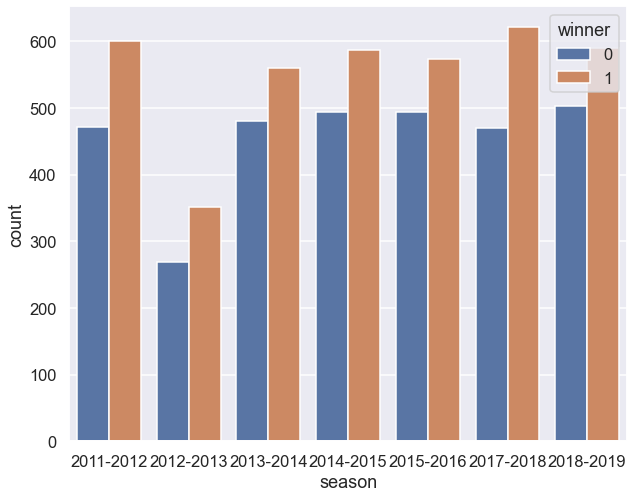

In [7]:
# plot the winners by home/away
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='season',hue='winner')
plt.show()

In [5]:
# percentages of home/away winners
season_winners = df.groupby(['season','winner']).agg({'winner':'count'})
winner_pcts = season_winners.groupby(level=0).apply(lambda x: 
                                                  100 * x / float(x.sum()))

In [6]:
winner_pcts

winner
season    winner           
2011-2012 0       44.029851
          1       55.970149
2012-2013 0       43.387097
          1       56.612903
2013-2014 0       46.250000
          1       53.750000
2014-2015 0       45.690454
          1       54.309546
2015-2016 0       46.298032
          1       53.701968
2017-2018 0       43.079743
          1       56.920257
2018-2019 0       46.020128
          1       53.979872

In [31]:
# percentages of home/away winners
total_winners = df.groupby(['winner']).agg({'winner':'count'})
total_winner_pcts = (total_winners['winner'][1] / total_winners['winner'].sum()) * 100

In [33]:
total_winner_pcts

54.379652605459064

In [50]:
# random.random() will return a random decimal between 0 and 1. Use this value to determine your choice:

from random import random 
print(1 if random() > 0.55 else 0)


1
